In [1]:
# Core libraries
import numpy as np                  # For numerical computations and array operations
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # For data visualization

# Scikit-learn model selection tools
from sklearn.model_selection import train_test_split   # To split data into training and testing sets
from sklearn.model_selection import KFold              # For k-fold cross-validation
from sklearn.model_selection import cross_val_score    # To evaluate models using cross-validation

# Scikit-learn performance metrics
from sklearn.metrics import classification_report      # To generate precision, recall, f1-score
from sklearn.metrics import confusion_matrix           # To show confusion matrix
from sklearn.metrics import accuracy_score             # To calculate accuracy of predictions

# Scikit-learn ML algorithms
from sklearn.linear_model import LogisticRegression    # Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier        # Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier     # K-Nearest Neighbors (KNN) classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Linear Discriminant Analysis
from sklearn.naive_bayes import GaussianNB             # Gaussian Naive Bayes classifier
from sklearn.svm import SVC                            # Support Vector Machine classifier

In [7]:
url = "https://drive.google.com/file/d/1c3C_4H_0DsmKpSr0AmmwvLLCC7UfMcwf/view?usp=sharing"
# Extract the file ID
file_id = url.split("/d/")[1].split("/")[0]
# Create direct download link
csv_url = f"https://drive.google.com/uc?id={file_id}"
# Read CSV into DataFrame
data = pd.read_csv(csv_url)
# Rename dataset columns for better readability
# Columns: sepal length, sepal width, petal length, petal width, and class label
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


In [9]:
data.head() # peek look into the data

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Looking through to understand the dataset properly

In [12]:
data.shape # Checking the Dimension of the dataset

(149, 5)

In [14]:
data.isnull().sum() # Checking for missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [16]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [18]:
# Generating descriptive statistics for all columns
# - For numeric features: shows count, mean, std, min, quartiles, max
# - For categorical features (like 'class'): shows count, unique values, top value, and frequency
data.describe(include="all")


,sepal_length,sepal_width,petal_length,petal_width,class
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.848322,3.051007,3.774497,1.205369,NaN
std,0.828594,0.433499,1.759651,0.761292,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [20]:
# looking through the class distribution
data.groupby("class").size()

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

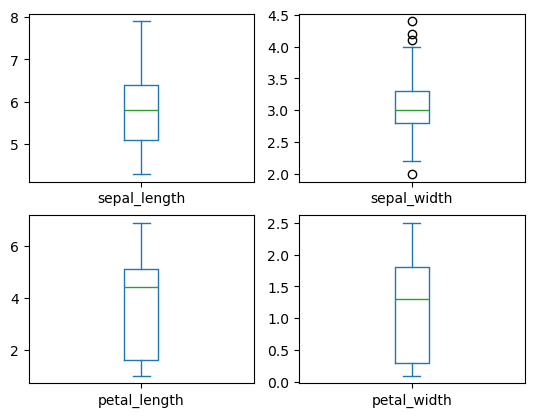

In [22]:
# Box and Whisker plot 
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

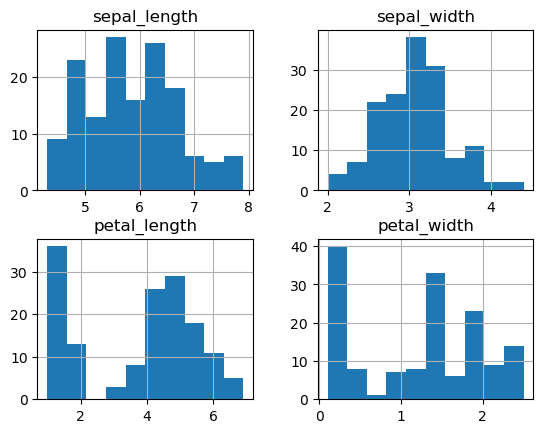

In [23]:
# Histogram
data.hist()
plt.show()

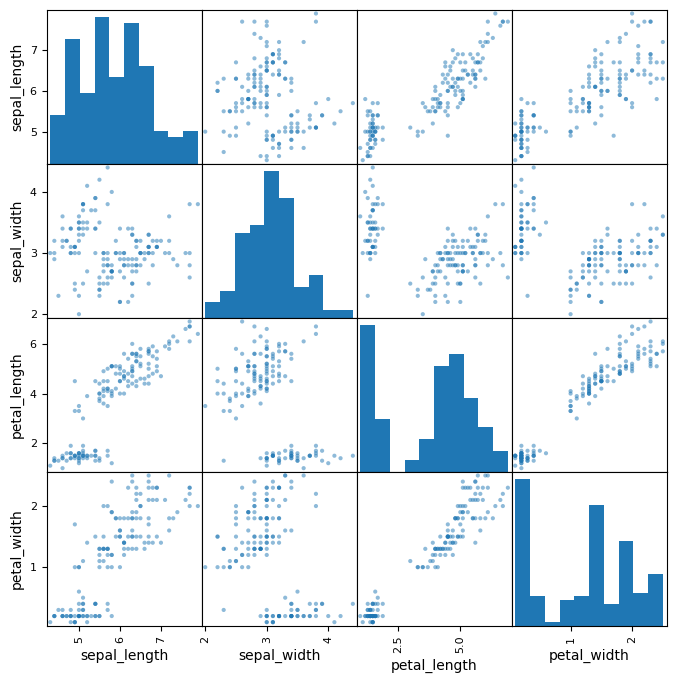

In [24]:
# scatter plot matrix
pd.plotting.scatter_matrix(data, figsize=(8,8), diagonal = "hist")
plt.show()

## Splitting the Dataset into Training and Validation Sets

In [28]:
# Convert DataFrame to a NumPy array for easier slicing
array = data.values   # Note: using 'data' since that's our DataFrame variable

# Separate features (X) and target (y)
X = array[:, 0:4]     # First 4 columns → features (sepal & petal measurements)
y = array[:, 4]       # Last column → target (class label)

# Define split size and random seed for reproducibility
validation_size = 0.20   # 20% of the data will be used for validation/testing
seed = 7                 # Ensures the same random split every run

# Perform train-test split
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=validation_size, random_state=seed
)


In [29]:
X

array([[4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.0, 3

In [30]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

## Model Selection & Evaluation

In [36]:
# Define a list of models to evaluate
# Each entry is a tuple: (short_name, model_instance)
models = []
models.append(('LR', LogisticRegression()))             # Logistic Regression
models.append(('LDA', LinearDiscriminantAnalysis()))    # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier()))          # K-Nearest Neighbors
models.append(('CART', DecisionTreeClassifier()))       # Decision Tree
models.append(('NB', GaussianNB()))                     # Naive Bayes
models.append(('SVM', SVC()))                           # Support Vector Machine

# Prepare containers for results
results = []   # Stores accuracy scores from cross-validation
names = []     # Stores model short names

# Evaluate each model using 10-fold cross-validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)   # Split training set into 10 folds
    cv_results = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy'
    )  # Perform cross-validation
    
    results.append(cv_results)   # Save accuracy scores for this model
    names.append(name)           # Save model name
    
    # Print mean accuracy and standard deviation
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.975000 (0.038188)
LDA: 0.983333 (0.033333)
KNN: 0.975000 (0.053359)
CART: 0.966667 (0.040825)
NB: 0.950000 (0.040825)
SVM: 0.958333 (0.055902)


## Algorithm Comparison through visualization

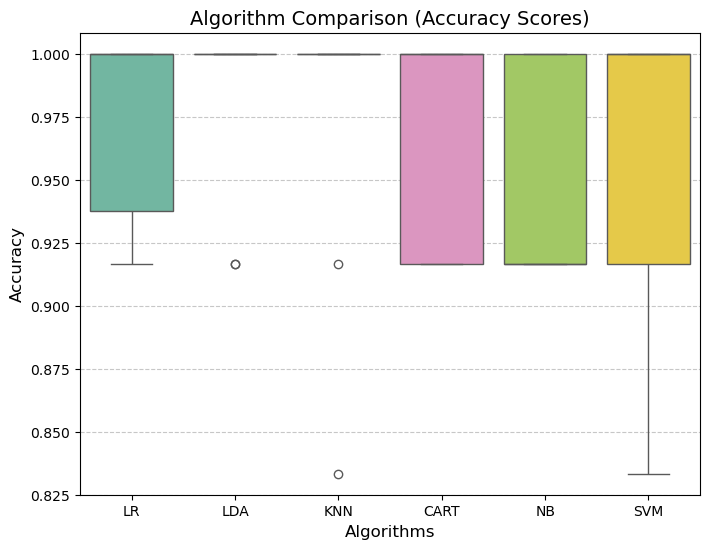

In [39]:
import seaborn as sns

# Convert results into a DataFrame for easier plotting
import pandas as pd
results_df = pd.DataFrame(results).T   # Transpose so each column = model
results_df.columns = names             # Assign model names as column headers

# Create a boxplot with seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=results_df, palette="Set2")

# Add title and axis labels
plt.title("Algorithm Comparison (Accuracy Scores)", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Algorithms", fontsize=12)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()


Accuracy: 0.9333333333333333

Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



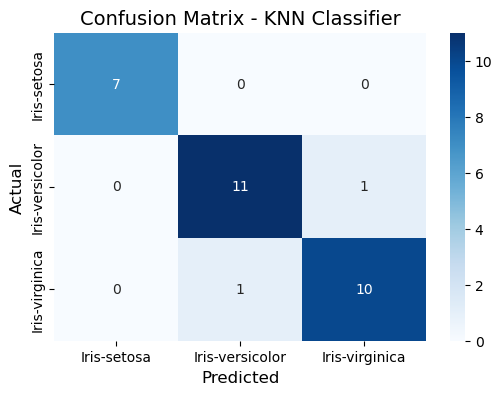

In [41]:
# Initialize the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Train the model on the training dataset
knn.fit(X_train, y_train)

# Make predictions on the validation (test) dataset
predictions = knn.predict(X_validation)

# Print overall accuracy
print("Accuracy:", accuracy_score(y_validation, predictions))

# Print confusion matrix (raw values)
cm = confusion_matrix(y_validation, predictions)
print("\nConfusion Matrix:")
print(cm)

# Print classification report (precision, recall, F1-score per class)
print("\nClassification Report:")
print(classification_report(y_validation, predictions))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=np.unique(y), yticklabels=np.unique(y))

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - KNN Classifier", fontsize=14)
plt.savefig("check.png")
plt.show()
